In [1]:
# this block of code is importing all the various parts of the project from their respective modules
from icon_util import *
from methods import *
from aberrations import *

import h5py

In [2]:
image_set_name = "icon10"
logdir = "Logs20200208"

hdf5_file = h5py.File('LLD-icon.hdf5', 'r')
images, _ = (hdf5_file['data'], hdf5_file['labels/resnet/rc_64'])

# transpose the images because they're stored in a weird color channel first format, as indicated by shape[0] being 3
images = [np.transpose(i) if i.shape[0] == 3 else i for i in images[:1000]]
print(len(images))

#method_classes = [zernike_method, orb_method, neural_method, sift_method, small_neural_method]
#method_classes = [zernike_method, orb_method, neural_method, sift_method, contour_method, small_neural_method]
#method_classes = [pca_method]
#method_classes = [zernike_method, orb_method, neural_method]
#method_classes=[horizontal_pca_method, vertical_pca_method, color_channel_pca_method]

method_classes = [pca_method,
                  horizontal_pca_method,
                  vertical_pca_method,
                  color_channel_pca_method,
                  zernike_method,
                  orb_method,
                  neural_method,
                  sift_method,
                  contour_method,
                  small_neural_method]


# uncomment this if you want to generate the databases
#generate_databases(images, method_classes, image_set_name)
#methods = load_databases(method_classes, image_set_name)
methods = [i() for i in method_classes]
methods[0].generate_database(images)
print("Loading Completed")

1000
Loading Completed


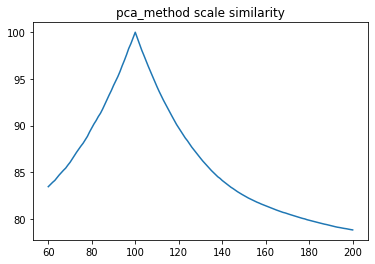

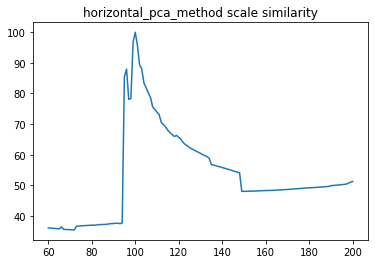

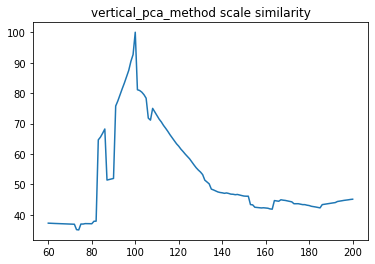

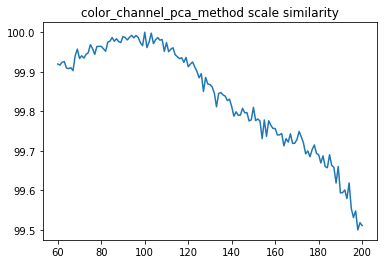

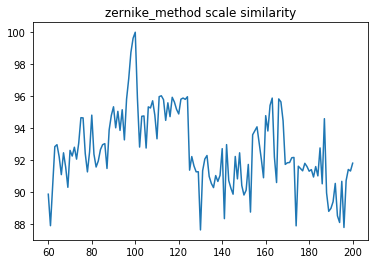

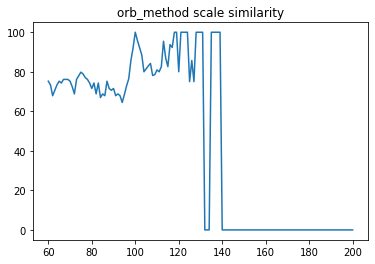

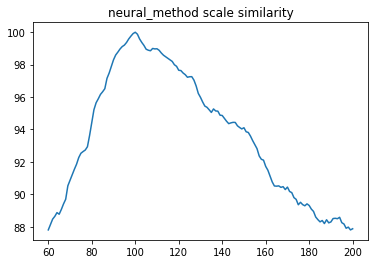

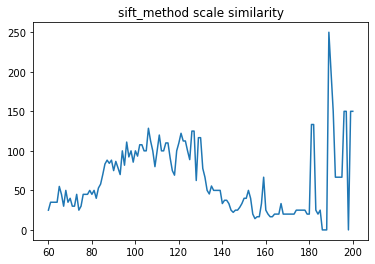

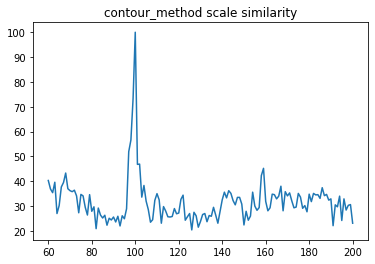

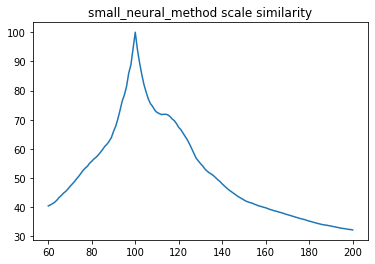

In [3]:
for m in methods:
    inv_m = invariance_measure(m, scale_stream(images[0]))
    x=[]
    y=[]
    for i,j in inv_m:
        y.append(i)
        x.append(j)
    plot_1d(x,y, title=m.__class__.__name__+" scale similarity")

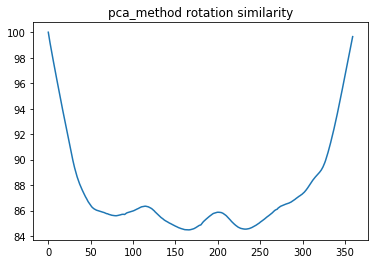

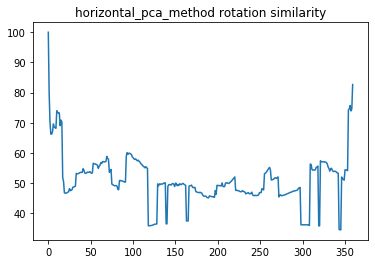

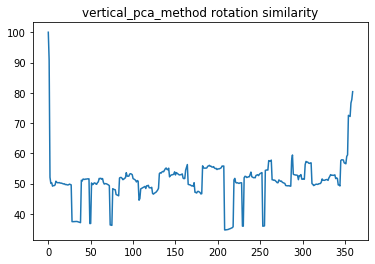

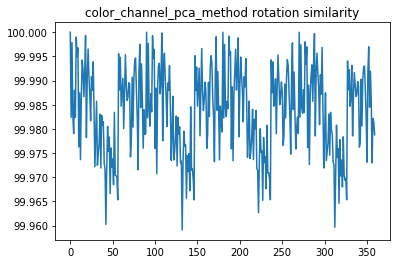

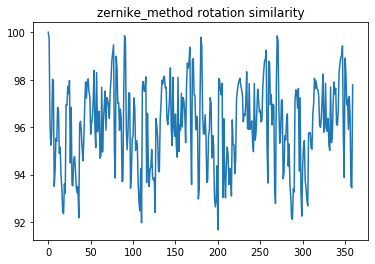

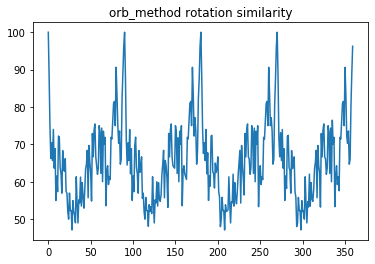

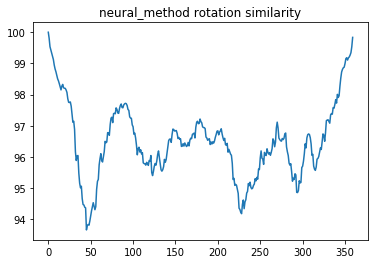

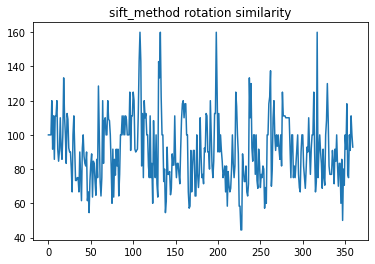

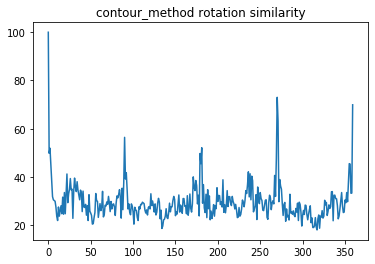

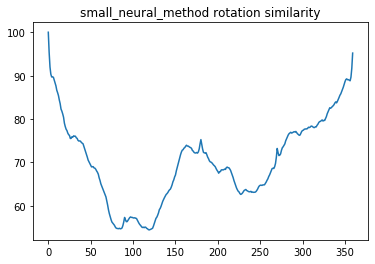

In [4]:
for m in methods:
    inv_m = invariance_measure(m, rotate_stream(images[0]))
    x=[]
    y=[]
    for i,j in inv_m:
        y.append(i)
        x.append(j)
    plot_1d(x,y, title=m.__class__.__name__+" rotation similarity")

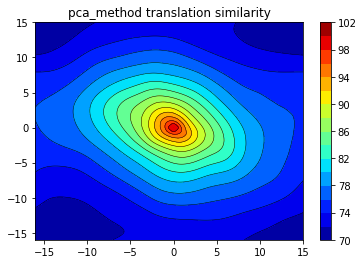

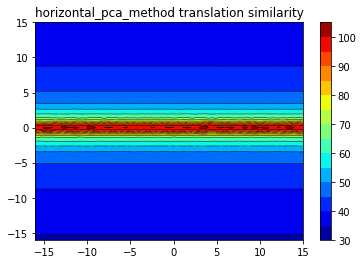

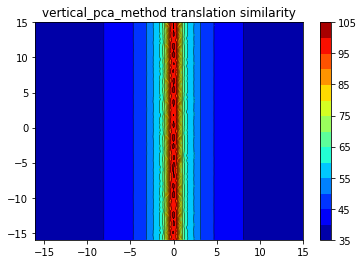

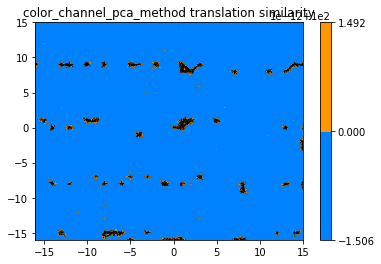

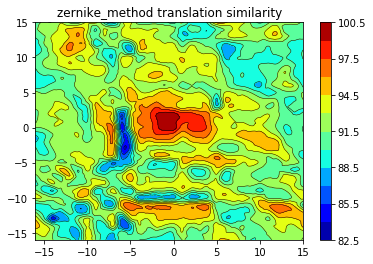

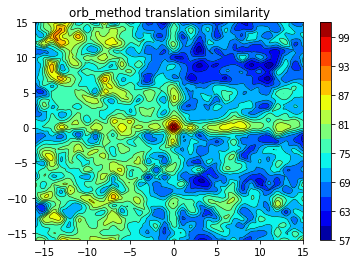

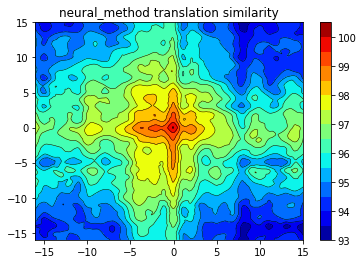

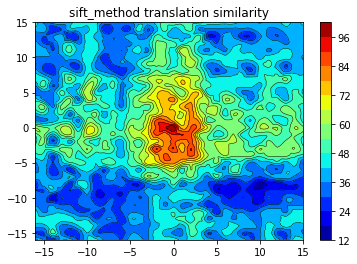

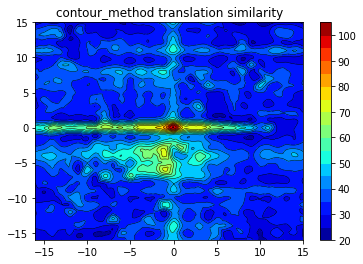

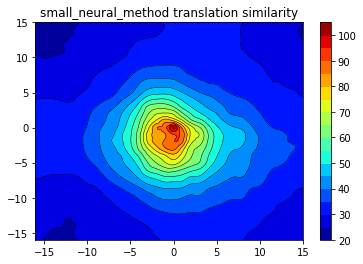

In [5]:
for m in methods:
    inv_m = invariance_measure(m, translate_stream(images[0]))
    x=[]
    y=[]
    z=[]
    for i,(j,k) in inv_m:
        x.append(j)
        y.append(k)
        z.append(i)
    heatmap_2d(x,y,z, title=m.__class__.__name__+" translation similarity")